In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from glob import glob
from sklearn.model_selection import train_test_split
import random
import matplotlib.pylab as plt
from glob import glob
from keras.utils.np_utils import to_categorical
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

SETS_PATH = '../covid_dataset/'
LABELS = ['Normal', 'Lung_Opacity', 'Viral Pneumonia', 'COVID']

2021-10-12 09:42:39.988884: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

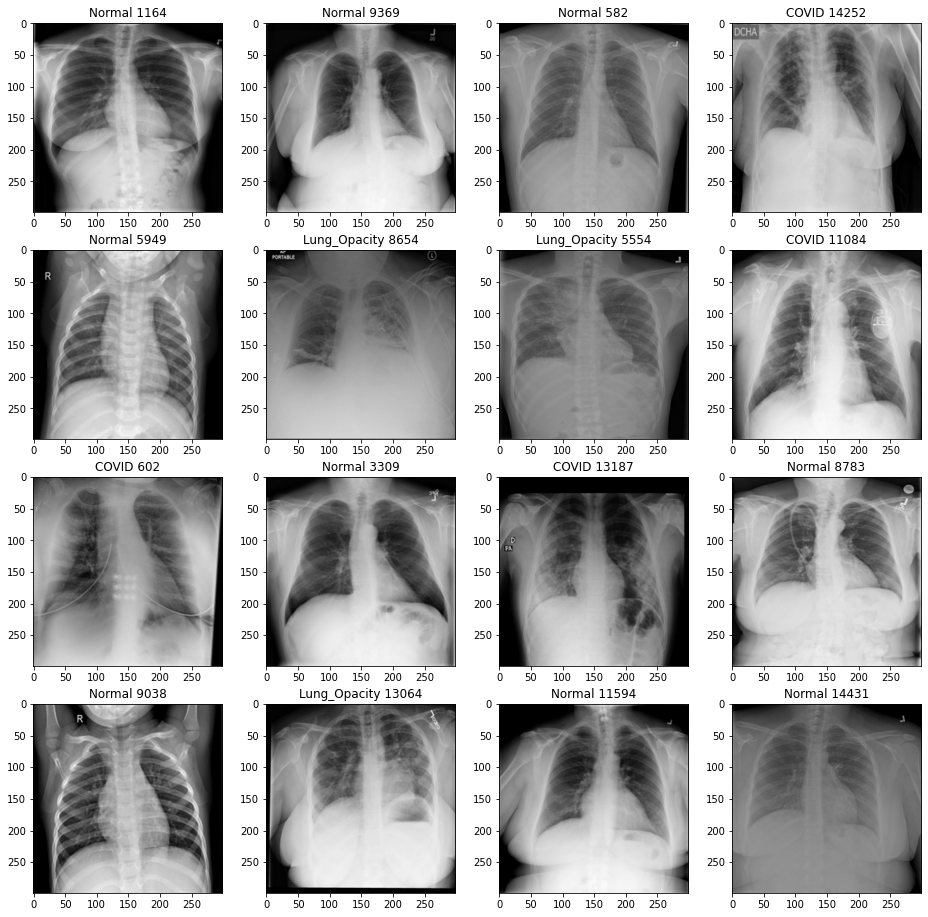

In [4]:
images_in_row = 4
random_indexes = random.choices(range(len(y_train)), k=images_in_row*images_in_row)
      
plt.figure(figsize=(16,16))
for j, index in enumerate(random_indexes):
    plt.subplot(images_in_row, images_in_row, j+1)
    plt.imshow(X_train[index], cmap='gray', vmax=1, vmin=0)
    plt.title(f'{LABELS[np.where(y_train[index]==1)[0][0]]} {index}')

In [10]:
my_model = Sequential()
my_model.add(Conv2D(64, kernel_size=6, activation='relu', input_shape=[299,299, 1]))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D((2, 2)))

my_model.add(Conv2D(128, kernel_size=5, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.3))

my_model.add(Conv2D(128, kernel_size=4, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(MaxPooling2D((2, 2)))
my_model.add(Dropout(0.3))

my_model.add(Conv2D(64, kernel_size=4, activation='relu'))
my_model.add(BatchNormalization())
my_model.add(Dropout(0.3))

my_model.add(Flatten())

my_model.add(Dense(512, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(128, activation='relu'))
my_model.add(Dropout(0.5))

my_model.add(Dense(4, activation='softmax'))

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
my_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 294, 294, 64)      2368      
_________________________________________________________________
batch_normalization (BatchNo (None, 294, 294, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 147, 147, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 143, 143, 128)     204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 143, 143, 128)     512       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 71, 71, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 71, 71, 128)      

In [11]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='checkpoints/4/epoch{epoch}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
csv_logger = keras.callbacks.CSVLogger('history/history4.csv')

history = my_model.fit(X_train, y_train,
                     epochs=50, batch_size=16, callbacks=[callback,model_checkpoint_callback,csv_logger],
                     verbose=1, validation_data=(X_test, y_test))

2021-10-11 13:50:07.661184: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 5297903260 exceeds 10% of free system memory.


Epoch 1/50
926/926 [==============================] - ETA: 0s - loss: 4.3016 - accuracy: 0.4777

2021-10-11 13:55:13.988364: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.


926/926 [==============================] - 346s 373ms/step - loss: 4.2994 - accuracy: 0.4777 - val_loss: 1.1307 - val_accuracy: 0.5701
Epoch 2/50
926/926 [==============================] - 344s 372ms/step - loss: 1.1027 - accuracy: 0.5707 - val_loss: 0.9922 - val_accuracy: 0.6008
Epoch 3/50
926/926 [==============================] - 347s 374ms/step - loss: 0.9731 - accuracy: 0.6123 - val_loss: 0.9687 - val_accuracy: 0.6529
Epoch 4/50
926/926 [==============================] - 346s 373ms/step - loss: 0.9591 - accuracy: 0.6157 - val_loss: 8.1067 - val_accuracy: 0.4869
Epoch 5/50
926/926 [==============================] - 345s 372ms/step - loss: 0.9075 - accuracy: 0.6282 - val_loss: 0.9663 - val_accuracy: 0.5370
Epoch 6/50
926/926 [==============================] - 345s 372ms/step - loss: 0.8918 - accuracy: 0.6311 - val_loss: 1.1304 - val_accuracy: 0.5346
Epoch 7/50
926/926 [==============================] - 350s 377ms/step - loss: 0.8438 - accuracy: 0.6547 - val_loss: 0.7606 - val_accura

KeyboardInterrupt: 

In [3]:
my_model = keras.models.load_model('checkpoints/4/epoch8.h5')
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='checkpoints/4/epoch1{epoch}.h5',
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
csv_logger = keras.callbacks.CSVLogger('history/history4_1.csv')

history = my_model.fit(X_train, y_train,
                     epochs=50, batch_size=16, callbacks=[callback,model_checkpoint_callback,csv_logger],
                     verbose=1, validation_data=(X_test, y_test))

2021-10-12 09:44:26.919159: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-12 09:44:26.920147: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-12 09:44:26.961606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-12 09:44:26.962029: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-10-12 09:44:26.962119: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-12 09:44:26.984671: I tensorflow/stream_executor/platform/def

Epoch 1/50


2021-10-12 09:44:31.671774: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-12 09:44:31.936462: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-10-12 09:44:33.036939: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-10-12 09:44:33.140365: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2021-10-12 09:44:34.622123: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.96GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-12 09:4

925/926 [============================>.] - ETA: 0s - loss: 0.7453 - accuracy: 0.7216

2021-10-12 09:50:18.135458: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.84GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-12 09:50:19.394255: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-12 09:50:22.733833: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2021-10-12 09:50:23.507099: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Alloc

926/926 [==============================] - ETA: 0s - loss: 0.7453 - accuracy: 0.7217

2021-10-12 09:50:27.678392: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2270785400 exceeds 10% of free system memory.


926/926 [==============================] - 408s 429ms/step - loss: 0.7453 - accuracy: 0.7217 - val_loss: 0.8573 - val_accuracy: 0.6647
Epoch 2/50
926/926 [==============================] - 377s 408ms/step - loss: 0.7070 - accuracy: 0.7370 - val_loss: 0.9048 - val_accuracy: 0.6737
Epoch 3/50
926/926 [==============================] - 375s 405ms/step - loss: 0.6618 - accuracy: 0.7580 - val_loss: 1.0744 - val_accuracy: 0.6657
Epoch 4/50
926/926 [==============================] - 365s 394ms/step - loss: 0.5773 - accuracy: 0.7948 - val_loss: 0.9841 - val_accuracy: 0.5222
Epoch 5/50
730/926 [======================>.......] - ETA: 1:04 - loss: 0.5173 - accuracy: 0.8226

KeyboardInterrupt: 